In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = df.drop(['region'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])# female 0 male 1
df['smoker'] = le.fit_transform(df['smoker'])# 1 yes 0 no
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
a = df.corr()
a

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


In [ ]:
df = df.drop(['sex'],axis=1)
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = df.drop(['charges'],axis=1)
y = df['charges']
X_scaled = scaler.fit_transform(X)



In [ ]:
X_scaled

array([[0.02173913, 0.3212268 , 0.        , 1.        ],
       [0.        , 0.47914985, 0.2       , 0.        ],
       [0.2173913 , 0.45843422, 0.6       , 0.        ],
       ...,
       [0.        , 0.56201238, 0.        , 0.        ],
       [0.06521739, 0.26472962, 0.        , 0.        ],
       [0.93478261, 0.35270379, 0.        , 1.        ]])

In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

# Create the base model (Linear Regression)
base_model = LinearRegression()

# Create the Bagging Regressor
bagging_model = BaggingRegressor(estimator=base_model, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],          # Number of base models
    'max_samples': [0.5, 0.7, 1.0],         # Fraction of samples to use for each base model
    'max_features': [0.5, 0.7, 1.0],        # Fraction of features to use for each base model
    'bootstrap': [True, False],             # Whether to use bootstrap samples
    'bootstrap_features': [True, False]     # Whether to bootstrap features
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R² Score: {best_score}")

# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_bag = best_model.predict(X_test)

r2_bag = r2_score(y_test, y_pred_bag)
mse_bag = mean_squared_error(y_test, y_pred_bag)

print(f"Test Set R² Score: {r2_bag}")
print(f"Test Set Mean Squared Error: {mse_bag}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 50}
Best Cross-Validation R² Score: 0.7348661346597343
Test Set R² Score: 0.7810525872249858
Test Set Mean Squared Error: 33991308.09672667


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_bag,'Error':abs(y_test-y_pred_bag)})
new

,Actual,Predicted,Error
764,"9,095.07","8,517.45",577.62
887,"5,272.18","6,975.30","1,703.12"
890,"29,330.98","36,700.52","7,369.53"
1293,"9,301.89","9,359.57",57.68
259,"33,750.29","26,839.85","6,910.44"
...,...,...,...
109,"47,055.53","39,088.93","7,966.60"
575,"12,222.90","11,670.91",551.99
535,"6,067.13","7,246.17","1,179.04"
543,"63,770.43","40,761.77","23,008.66"


In [ ]:
new['Error'].mean()

4199.0903367463625

In [ ]:
import joblib
joblib.dump(best_model,'insurance_model_bagging.pkl')

['insurance_model_bagging.pkl']

In [ ]:
new.to_csv('new.csv')

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create the base model (in this case, a simple Linear Regression)
base_model = LinearRegression()

# Create the Bagging Regressor (using 'estimator' instead of 'base_estimator')
bagging_model = BaggingRegressor(estimator=base_model, n_estimators=60, random_state=42)

# Fit the model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bag = bagging_model.predict(X_test)

# Evaluate the model
r2_bag = r2_score(y_test, y_pred_bag)
mse_bag = mean_squared_error(y_test, y_pred_bag)

print(f"Bagging (Linear Regression) R² score: {r2_bag}")
print(f"Bagging (Linear Regression) Mean Squared Error: {mse_bag}")


Bagging (Linear Regression) R² score: 0.7810553691643306
Bagging (Linear Regression) Mean Squared Error: 33990876.204172306


In [ ]:
y_pred = bagging_model.predict(X_test)
pd.options.display.float_format = '{:,.2f}'.format
new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':abs(y_test-y_pred)})
new

,Actual,Predicted,Error
764,"9,095.07","8,489.51",605.56
887,"5,272.18","6,958.48","1,686.31"
890,"29,330.98","36,730.65","7,399.67"
1293,"9,301.89","9,340.32",38.43
259,"33,750.29","26,836.65","6,913.64"
...,...,...,...
109,"47,055.53","39,170.74","7,884.79"
575,"12,222.90","11,667.88",555.02
535,"6,067.13","7,222.90","1,155.77"
543,"63,770.43","40,910.17","22,860.26"


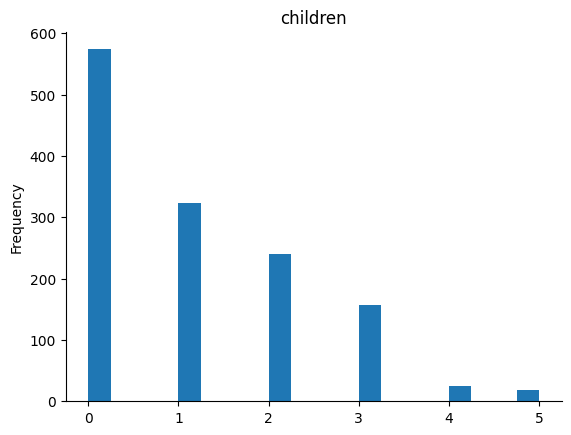

In [ ]:
# @title children

from matplotlib import pyplot as plt
df['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

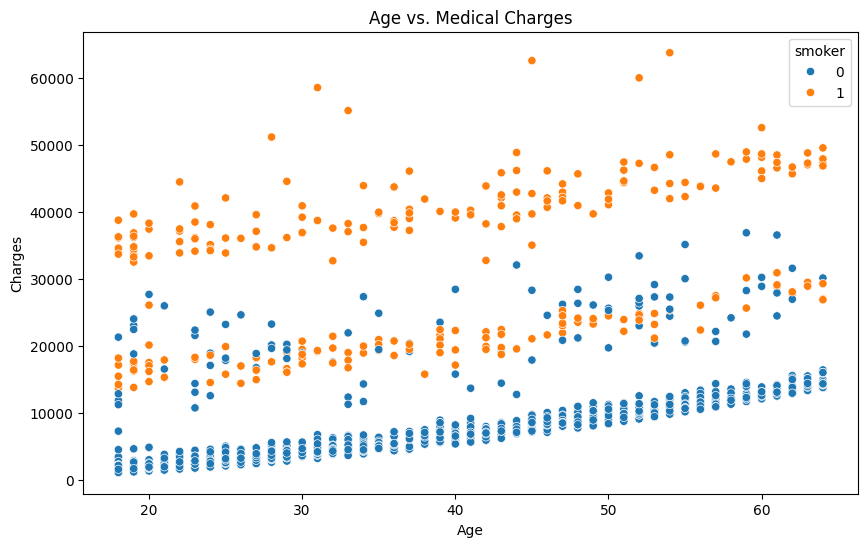

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is a DataFrame called df
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs. Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


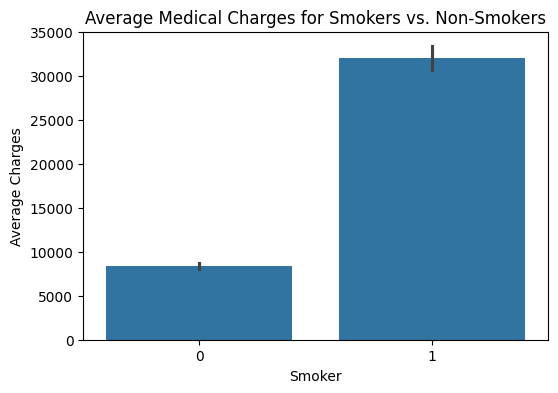

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Average Medical Charges for Smokers vs. Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()


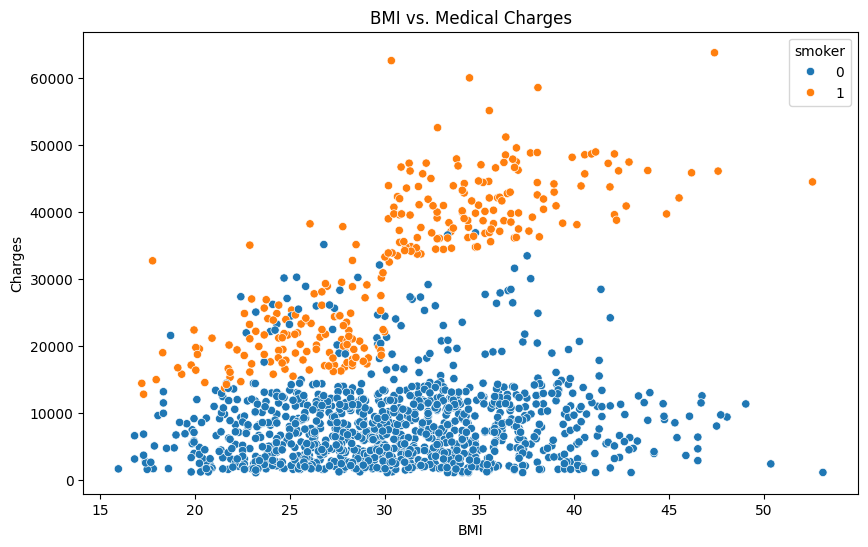

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('BMI vs. Medical Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


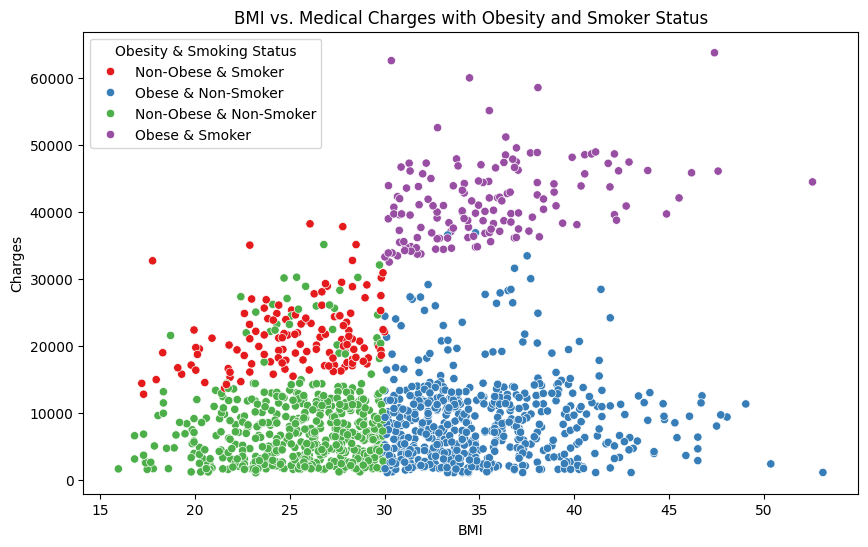

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for obesity classification
df['obesity_status'] = df['bmi'].apply(lambda x: 'Obese' if x > 30 else 'Non-Obese')

# Combine obesity status and smoker status for legend
df['legend_label'] = df.apply(lambda row: f"{row['obesity_status']} & Smoker" if row['smoker'] == 1 else f"{row['obesity_status']} & Non-Smoker", axis=1)

# Plot the scatter plot with the combined label as the hue
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', hue='legend_label', data=df, palette='Set1')
plt.title('BMI vs. Medical Charges with Obesity and Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Obesity & Smoking Status')
plt.show()


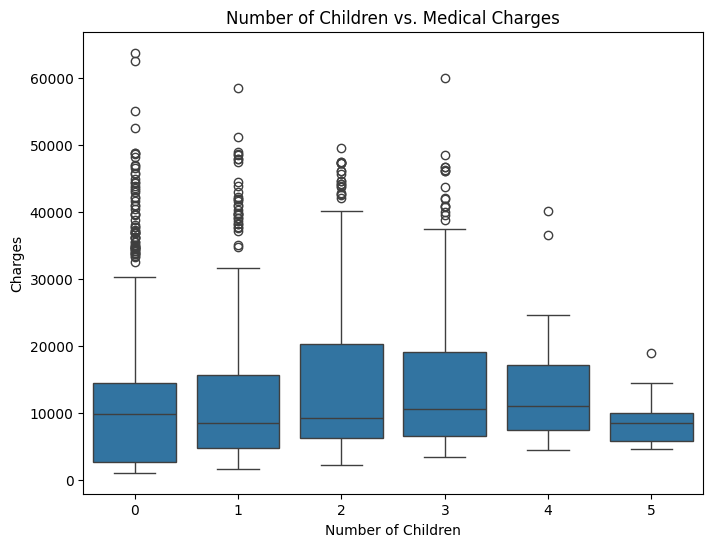

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Number of Children vs. Medical Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()


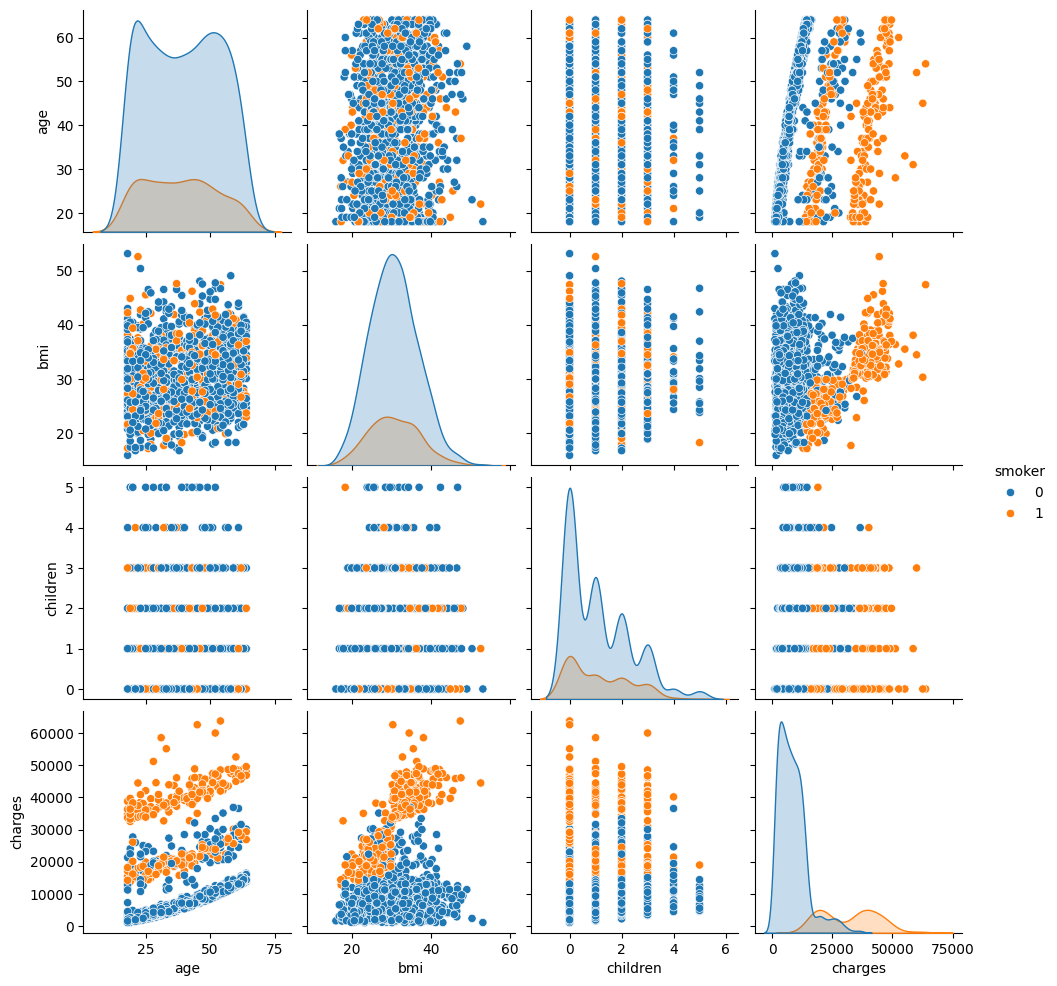

In [ ]:
sns.pairplot(df, hue='smoker', vars=['age', 'bmi', 'children', 'charges'])
plt.show()



In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_scaled, y)

# Get ranking of features
print(rfe.ranking_)


[1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


In [ ]:
lr.score(X_test,y_test)

0.7811147722517887

In [ ]:
y_test

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


In [ ]:
y_pred = lr.predict(X_test)
new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':abs(y_test-y_pred)})
new


,Actual,Predicted,Error
764,9095.06825,8550.909213,544.159037
887,5272.17580,6969.715998,1697.540198
890,29330.98315,36794.136618,7463.153468
1293,9301.89355,9421.868242,119.974692
259,33750.29180,26875.010958,6875.280842
...,...,...,...
109,47055.53210,39224.388648,7831.143452
575,12222.89830,11691.841974,531.056326
535,6067.12675,7257.650635,1190.523885
543,63770.42801,40945.827042,22824.600968


In [ ]:
"""import joblib

joblib.dump(lr,'insurance_model2.pkl')

SyntaxError: incomplete input (<ipython-input-17-c7b2b2b1c819>, line 1)

In [ ]:
"""joblib.dump(scaler,'scaler.pkl')

In [ ]:
loaded_model = joblib.load('/content/insurance_model1.pkl')
scaler = joblib.load('/content/scaler.pkl')

In [ ]:
new.to_csv('new.csv')

In [ ]:
y_pred = loaded_model.predict(X_test)
new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':abs(y_test-y_pred)})
print(new)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

        Actual  Predicted     Error
764   9,095.07   8,550.91    544.16
887   5,272.18   6,969.72  1,697.54
890  29,330.98  36,794.14  7,463.15
1293  9,301.89   9,421.87    119.97
259  33,750.29  26,875.01  6,875.28
...        ...        ...       ...
109  47,055.53  39,224.39  7,831.14
575  12,222.90  11,691.84    531.06
535   6,067.13   7,257.65  1,190.52
543  63,770.43  40,945.83 22,824.60
846   9,872.70  12,622.03  2,749.33

[268 rows x 3 columns]
Mean Squared Error: 33981653.95019775


In [ ]:

# Create a DataFrame for new input with the same feature names
new_data = pd.DataFrame([[28, 33.000, 3, 0]], columns=['age', 'bmi', 'children', 'smoker'])

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict using the scaled data
result = loaded_model.predict(new_data_scaled)[0]

print("Prediction:", result)

Prediction: 7170.764087468429


In [ ]:
# Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are.
# Here are some factors that affect how much health insurance premiums cost



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import joblib
# Save the scaler
joblib.dump(scaler, 'treescaler.pkl')

['scaler.pkl']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
score = rf.score(X_test_scaled, y_test)
print("R^2 score:", score)

# Cross-validation score
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

R^2 score: 0.8586734196317931
Cross-validation scores: [0.80873235 0.89123499 0.79432913 0.76554615 0.82890549]
Average CV score: 0.8177496196834749


In [ ]:
y_pred = lr.predict(X_test)
new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':abs(y_test-y_pred)})
print(new)


           Actual     Predicted         Error
764    9095.06825  8.406276e+05  8.315326e+05
887    5272.17580  7.889113e+05  7.836391e+05
890   29330.98315  1.105507e+06  1.076176e+06
1293   9301.89355  8.615281e+05  8.522262e+05
259   33750.29180  6.346655e+05  6.009152e+05
...           ...           ...           ...
109   47055.53210  1.193569e+06  1.146514e+06
575   12222.89830  1.014371e+06  1.002148e+06
535    6067.12675  7.904107e+05  7.843435e+05
543   63770.42801  1.237126e+06  1.173355e+06
846    9872.70100  1.019314e+06  1.009441e+06

[268 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # removed 'auto'
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
best_rf = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200
)

# Fit the model to the entire training data
best_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error:", mse)

R^2 score: 0.87593256944397
Mean Squared Error: 19261311.213267352


In [ ]:
y_pred = lr.predict(X_test)
pd.options.display.float_format = '{:,.2f}'.format
new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':abs(y_test-y_pred)})
new


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Actual,Predicted,Error
764,"9,095.07","840,627.62","831,532.55"
887,"5,272.18","788,911.27","783,639.09"
890,"29,330.98","1,105,506.59","1,076,175.61"
1293,"9,301.89","861,528.08","852,226.19"
259,"33,750.29","634,665.47","600,915.18"
...,...,...,...
109,"47,055.53","1,193,569.12","1,146,513.59"
575,"12,222.90","1,014,371.34","1,002,148.44"
535,"6,067.13","790,410.65","784,343.53"
543,"63,770.43","1,237,125.54","1,173,355.11"


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Create the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"Gradient Boosting R² score: {r2_gb}")
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
pd.options.display.float_format = '{:,.2f}'.format
new = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':abs(y_test-y_pred)})
new


Gradient Boosting R² score: 0.8778503823469317
Gradient Boosting Mean Squared Error: 18963573.192844003


,Actual,Predicted,Error
764,"9,095.07","840,627.62","831,532.55"
887,"5,272.18","788,911.27","783,639.09"
890,"29,330.98","1,105,506.59","1,076,175.61"
1293,"9,301.89","861,528.08","852,226.19"
259,"33,750.29","634,665.47","600,915.18"
...,...,...,...
109,"47,055.53","1,193,569.12","1,146,513.59"
575,"12,222.90","1,014,371.34","1,002,148.44"
535,"6,067.13","790,410.65","784,343.53"
543,"63,770.43","1,237,125.54","1,173,355.11"


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R² score from GridSearch: {grid_search.best_score_}")


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best R² score from GridSearch: 0.8407638679130794
